<a href="https://colab.research.google.com/github/ruan-narici/brazilian-ecommerce-analytics/blob/main/brazilian_ecommerce_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Projeto: Análise de Vendas e Entregas no E-commerce Brasileiro

### Imports

In [ ]:
import pandas as pd

### Load datasets

In [ ]:
df_customers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_customers_dataset.csv") #OK
# df_geolocation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_geolocation_dataset.csv") #EXCLUDE
df_order_items = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_items_dataset.csv") #OK
df_order_payments = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_payments_dataset.csv") #OK
df_order_reviews = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_reviews_dataset.csv") #OK
df_orders = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_orders_dataset.csv") #OK
df_products = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_products_dataset.csv") #OK
df_sellers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_sellers_dataset.csv") #OK
df_product_category_name_translation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/product_category_name_translation.csv") #OK

### Define Types

In [ ]:
# DateTimeType
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])
df_order_reviews["review_creation_date"] = pd.to_datetime(df_order_reviews["review_creation_date"])
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"])
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

### Merge datasets

In [ ]:
df_merged = df_orders.merge(df_order_items, on="order_id")
df_merged = df_merged.merge(df_customers, on="customer_id")
df_merged = df_merged.merge(df_sellers, on="seller_id")
df_merged = df_merged.merge(df_products, on="product_id")
df_merged = df_merged.merge(df_order_payments, on="order_id")
df_merged = df_merged.merge(df_product_category_name_translation, on="product_category_name")
df_merged = df_merged.merge(df_order_reviews, on="order_id")

df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name_english', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

### Handling null values

In [ ]:
# DateTimeType
# df_merged["order_approved_at"] = df_merged["order_approved_at"].fillna('1900-01-01')
# df_merged["order_delivered_carrier_date"] = df_merged["order_delivered_carrier_date"].fillna('1900-01-01')
# df_merged["order_delivered_customer_date"] = df_merged["order_delivered_customer_date"].fillna('1900-01-01')

# FloatType
df_merged["product_weight_g"] = df_merged["product_weight_g"].fillna('-2')
df_merged["product_length_cm"] = df_merged["product_length_cm"].fillna('-2')
df_merged["product_height_cm"] = df_merged["product_height_cm"].fillna('-2')
df_merged["product_width_cm"] = df_merged["product_width_cm"].fillna('-2')
df_merged["review_comment_message"] = df_merged["product_width_cm"].fillna('-2')

# StrType
df_merged["review_comment_title"] = df_merged["review_comment_title"].fillna('-2')


# DropNa
## If product does not have the filled fields: {order_approved_at, order_delivered_carrier_date, order_delivered_customer_date}, this product was not sales, then remove her
df_merged = df_merged.dropna()

df_merged.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


### Selecting and Creating some columns

In [ ]:
# Selecting some Columns
df_analysis = df_merged[
    [
        "order_id",
        "seller_id",
        "customer_id",
        "order_purchase_timestamp",
        "order_approved_at",
        "shipping_limit_date",
        "order_estimated_delivery_date",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_status",
        "product_id",
        "seller_city",
        "seller_state",
        "customer_city",
        "customer_state",
        "product_category_name_english",
        "payment_type",
        "price",
        "freight_value",
        "payment_value",
        "review_score",
        "review_creation_date",
        "review_answer_timestamp",
        ]
    ].copy()


# Creating some columns
df_analysis["order_delivered_days"] = (df_analysis["order_delivered_customer_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_estimated_delivery_days"] = (df_analysis["order_estimated_delivery_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_diff_estimated_delivery_days"] = (df_analysis["order_delivered_days"] - df_analysis["order_estimated_delivery_days"])

# Preview
df_analysis.sample(5)

,order_id,seller_id,customer_id,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,order_status,...,payment_type,price,freight_value,payment_value,review_score,review_creation_date,review_answer_timestamp,order_delivered_days,order_estimated_delivery_days,order_diff_estimated_delivery_days
49770,bab35d4bee5e00cef20aed6a2cb89dd4,1336efc61c316ddf92c899eb817f7cae,8fbb909a9ba45685555683ea0138d2ee,2017-07-05 09:08:28,2017-07-05 17:40:45,2017-07-11 17:31:01,2017-07-27,2017-07-07 17:11:18,2017-07-07 20:12:29,delivered,...,credit_card,48.0,16.73,287.53,1,2017-07-08,2017-07-09 13:12:17,0,19,-19
23824,4c3797c712aa273fcc2d7e7a07c39703,b33e7c55446eabf8fe1a42d037ac7d6d,a89d75c00ff6de2a4a7e348b806a844f,2017-12-19 16:06:01,2017-12-19 16:35:44,2017-12-26 16:31:17,2018-01-18,2017-12-20 20:25:21,2018-01-18 15:09:56,delivered,...,credit_card,219.0,16.28,235.28,5,2018-01-19,2018-01-25 17:30:35,28,28,0
20415,35e848019d8ceb908dc3729407016572,53243585a1d6dc2643021fd1853d8905,53cde9f80e712a986103679352129e29,2017-12-03 21:41:56,2017-12-03 22:07:51,2017-12-07 22:07:51,2018-01-18,2017-12-06 21:27:40,2017-12-28 12:57:56,delivered,...,credit_card,189.9,35.13,675.09,4,2017-12-29,2017-12-29 15:47:16,21,42,-21
89721,7f67aa0d55e12f8edd5ad5d2207e9504,e882b2a25a10b9c057cc49695f222c19,39b7aa490a7fe0a3b97c53221bcc7367,2018-05-31 10:40:59,2018-05-31 10:54:08,2018-06-08 10:54:08,2018-07-17,2018-06-01 13:29:00,2018-06-06 20:04:47,delivered,...,credit_card,98.9,9.61,108.51,5,2018-06-07,2018-06-08 19:04:14,5,45,-40
87324,4527fe780d1facd3191d875fd794b233,f8db351d8c4c4c22c6835c19a46f01b0,f3fb90a75a693cc508aeee93a9cd627a,2017-06-07 17:52:49,2017-06-07 18:05:24,2017-06-13 18:05:24,2017-06-28,2017-06-08 14:33:13,2017-06-12 16:47:52,delivered,...,credit_card,61.9,12.77,5.30,5,2017-06-13,2017-06-14 13:28:37,4,19,-15


### Exploratory Analysis

**Top 7 States by Seller Count**

In [ ]:
# Top 7 States by Seller Count
df_most_sellers_by_seller_state = df_analysis.groupby(["seller_state"]).agg({
    "payment_value": "sum",
    "seller_state": "count"
    }).rename(columns={
        "seller_state": "total_sales",
        "payment_value": "total_sale_value"
        }).sort_values(by="total_sales", ascending=False)
df_most_sellers_by_seller_state.head(7)

,total_sale_value,total_sales
seller_state,,
SP,12771107.02,80728
MG,1477541.91,8793
PR,1779514.54,8756
RJ,1049683.83,4779
SC,846727.31,4147
RS,545013.23,2195
DF,132436.25,920


**Top 7 Customer States by Number of Purchases**

In [ ]:
# Top 7 Customer States by Number of Purchases
df_most_purchases_by_customer_state = df_analysis.groupby(["customer_state"]).agg({
    "payment_value": "sum",
    "customer_state": "count"
    }).rename(columns={
        "payment_value": "total_payment_value",
        "customer_state": "total_purchases"
        }).sort_values(by="total_purchases", ascending=False)
df_most_purchases_by_customer_state.head(7)

,total_payment_value,total_purchases
customer_state,,
SP,7319746.34,47812
RJ,2633042.81,14566
MG,2245371.75,13216
RS,1095143.79,6311
PR,1022798.67,5790
SC,751071.23,4143
BA,759188.41,3844


**Top 7 Customer States by Highest Average Freight Cost**

In [ ]:
# Top 7 Customer States by Highest Average Freight Cost
df_avg_most_expensive_freight_by_customer = df_analysis.groupby(["customer_state"]).agg({
    "freight_value": "mean",
    "review_score": "mean"
    }).rename(columns={
        "freight_value": "avg_freight_value"
        }).sort_values(by="avg_freight_value", ascending=False)
df_avg_most_expensive_freight_by_customer.head(7)

,avg_freight_value,review_score
customer_state,,
RR,43.777500,3.886364
PB,43.759851,4.026446
RO,41.337883,4.083942
AC,40.209022,4.108696
TO,40.160334,4.182371
PI,39.203013,3.914972
MA,38.529071,3.739777


**Top 7 Customer States by Highest Average Delivery Time**

In [ ]:
# Top 7 Customer States by Highest Average Delivery Time
df_avg_most_days_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_days_to_delivery", ascending=False)
df_avg_most_days_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_review_score
customer_state,,,
RR,41.954545,24.090909,3.886364
AP,42.182927,24.048780,4.280488
AM,42.365269,23.191617,4.113772
AL,28.513699,20.356164,3.812785
PA,33.520833,19.593750,3.840909
SE,26.767016,17.327225,3.890052
MA,26.702602,17.302354,3.739777


**Top 7 Customer States by Highest Average Delivery Delay**

In [ ]:
# Top 7 Customer States by Highest Average Delivery Delay
df_most_days_diff_estimated_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "order_diff_estimated_delivery_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_order_diff_estimated_delivery_days", ascending=False)
df_most_days_diff_estimated_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_order_diff_estimated_delivery_days,avg_review_score
customer_state,,,,
AL,28.513699,20.356164,-8.157534,3.812785
MA,26.702602,17.302354,-9.400248,3.739777
SE,26.767016,17.327225,-9.439791,3.890052
ES,21.821429,11.630511,-10.190917,4.013228
BA,25.789022,15.328564,-10.460458,3.868106
MS,22.475508,11.844683,-10.630824,4.097969
SP,15.739166,5.068226,-10.670940,4.180394


**Top 7 Best-Selling Product Categories**

In [ ]:
# Top 7 Best-Selling Product Categories
df_best_sales_products_categories = df_analysis.groupby("product_category_name_english").agg({
        "product_id": "count",
        "price": "mean",
        "order_estimated_delivery_days": "mean",
        "order_delivered_days": "mean",
        "order_diff_estimated_delivery_days": "mean",
        "review_score": "mean"
        }).rename(columns={
            "product_id": "total_sales",
            "price": "avg_price",
            "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
            "order_delivered_days": "avg_order_delivered_days",
            "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
            "review_score": "avg_review_score",
            }).sort_values(by="total_sales", ascending=False)
df_best_sales_products_categories.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
bed_bath_table,11684,92.595886,20.275933,9.135313,-11.140620,3.915354
health_beauty,9749,129.969482,19.836188,8.437686,-11.398502,4.186276
sports_leisure,8734,113.299196,20.351385,8.852072,-11.499313,4.164071
furniture_decor,8554,87.254681,20.483633,8.557166,-11.926467,3.960019
computers_accessories,7926,116.386928,21.008579,9.066490,-11.942089,3.988897
housewares,7154,90.331698,19.177523,7.455130,-11.722393,4.116578
watches_gifts,6030,200.224776,20.650415,9.341294,-11.309121,4.069320


**Top 7 Product Categories with the Best Scores**

In [ ]:
# Top 7 Product Categories with the Best Scores
df_best_product_categories_score = df_best_sales_products_categories.sort_values(by=["avg_review_score", "total_sales"], ascending=False)
df_best_product_categories_score.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
fashion_childrens_clothes,7,74.278571,21.714286,6.428571,-15.285714,5.000000
cds_dvds_musicals,14,52.142857,24.071429,7.571429,-16.500000,4.642857
books_imported,59,78.489153,15.491525,5.118644,-10.372881,4.525424
books_general_interest,544,85.147188,19.536765,8.126838,-11.409926,4.501838
small_appliances_home_oven_and_coffee,75,641.194133,17.613333,6.706667,-10.906667,4.453333
flowers,31,32.265806,19.193548,7.258065,-11.935484,4.419355
costruction_tools_tools,101,157.853465,20.613861,8.722772,-11.891089,4.415842


**Top 7 Product Categories with the Worst Scores**

In [ ]:
# Top 7 Product Categories with the Worst Scores
df_worst_product_categories_score = df_best_sales_products_categories.sort_values(by=["avg_review_score", "total_sales"], ascending=[True, False])
df_worst_product_categories_score.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
security_and_services,2,141.645000,29.500000,13.000000,-16.500000,2.500000
diapers_and_hygiene,37,40.561892,16.972973,6.297297,-10.675676,3.378378
office_furniture,1748,158.737243,20.651030,9.651030,-11.000000,3.553204
home_comfort_2,28,26.231071,19.392857,11.821429,-7.571429,3.642857
fashion_male_clothing,137,80.957080,19.430657,7.678832,-11.751825,3.649635
fixed_telephony,259,214.183398,22.293436,8.320463,-13.972973,3.756757
audio,375,138.940480,19.450667,9.866667,-9.584000,3.845333


### Charts and Views [Matplotlib]

**Top 20 States with the Most Sellers**

<Axes: title={'center': 'Top 20 States with the Most Sellers'}, xlabel='seller_state'>

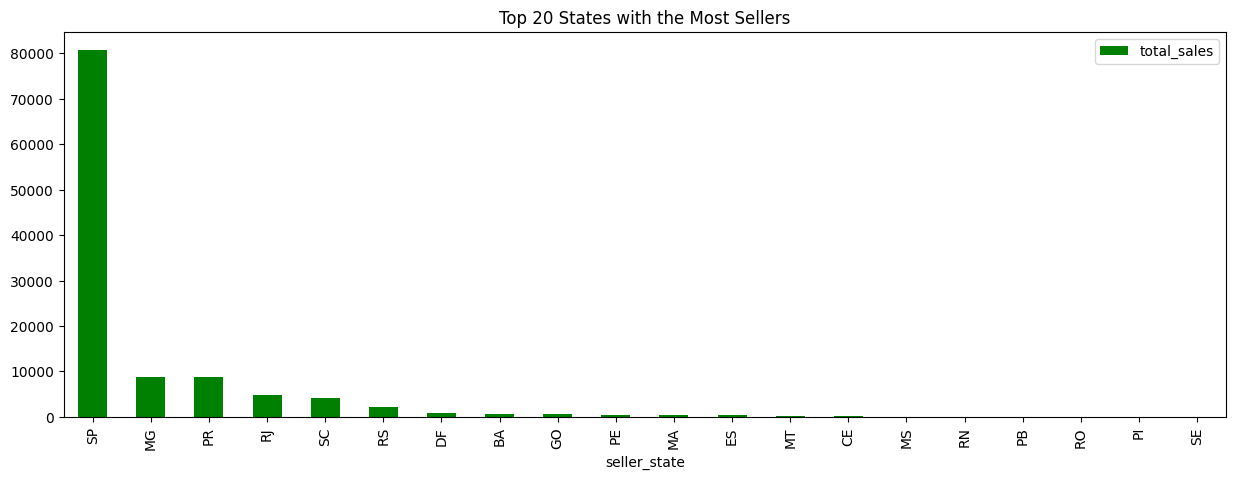

In [ ]:
df_most_sellers_by_seller_state.head(20).plot.bar(
    color=["green"],
    y=["total_sales"],
    title="Top 20 States with the Most Sellers",
    figsize=(15, 5)
    )

**Top 20 States with the Most Purchases**

<Axes: title={'center': 'Top 20 States with the Most Purchases'}, ylabel='customer_state'>

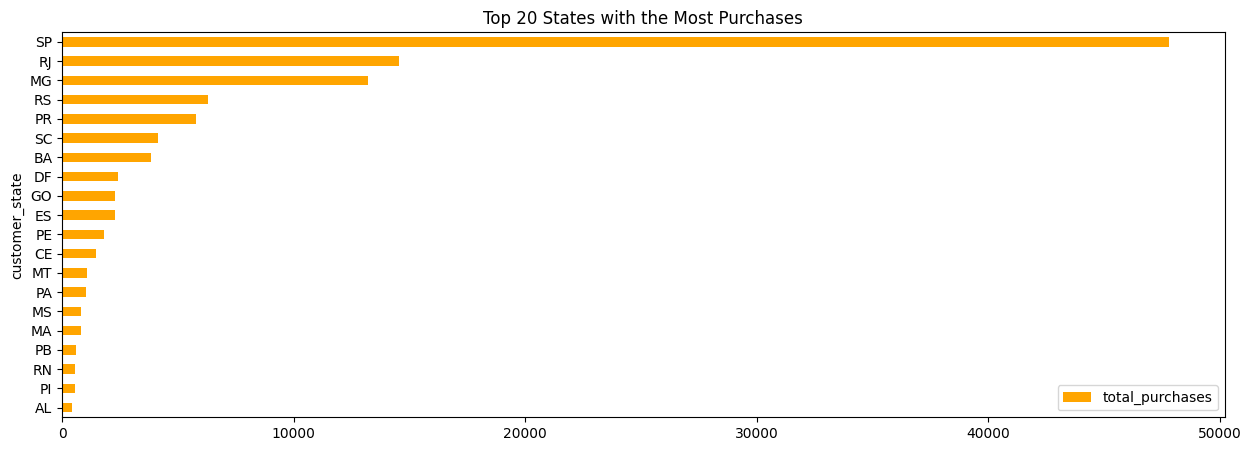

In [ ]:
df_most_purchases_by_customer_state.head(20).sort_values(by="total_purchases").plot.barh(
    color=["orange"],
    y=["total_purchases"],
    title="Top 20 States with the Most Purchases",
    figsize=(15, 5)
    )

**Top 15 Customer States by Highest Average Freight Cost**

<Axes: title={'center': 'Top 15 Customer States by Highest Average Freight Cost'}, xlabel='customer_state', ylabel='avg_freight_value'>

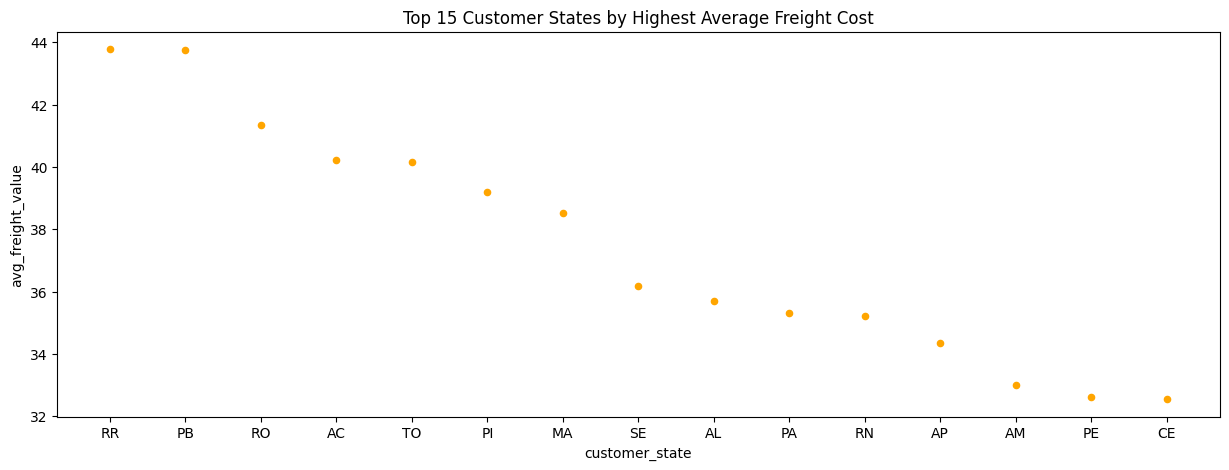

In [ ]:
df_avg_most_expensive_freight_by_customer.head(15).reset_index().plot.scatter(
    x="customer_state",
    y="avg_freight_value",
    color="orange",
    title="Top 15 Customer States by Highest Average Freight Cost",
    figsize=(15, 5)
    )

**Top 7 Customer States by Highest Average Delivery Time**

<Axes: title={'center': 'Top 7 Customer States by Highest Average Delivery Time'}, xlabel='customer_state'>

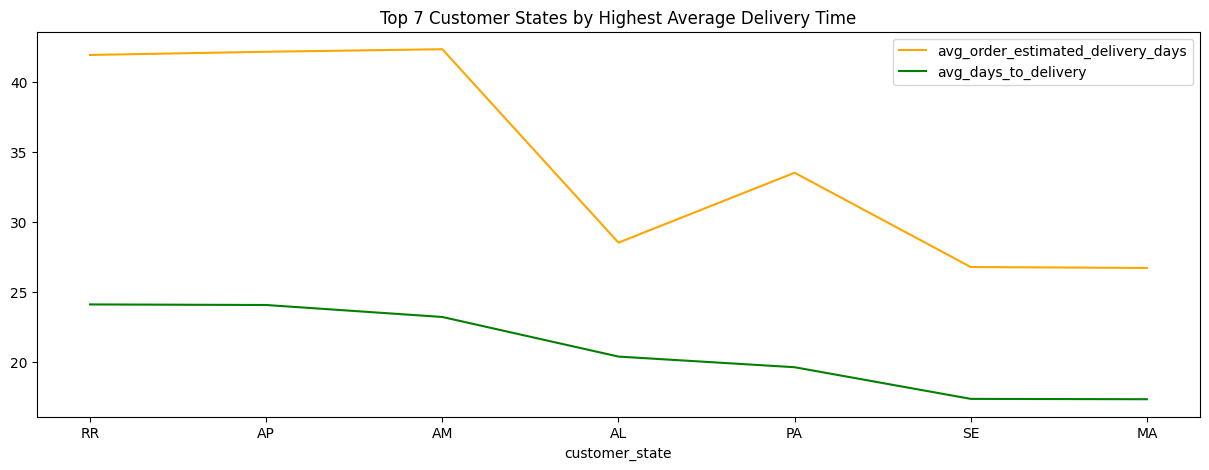

In [ ]:
df_avg_most_days_to_delivered_by_customer_state.head(7)[["avg_order_estimated_delivery_days", "avg_days_to_delivery"]].plot(
    color=["orange", "green"],
    title="Top 7 Customer States by Highest Average Delivery Time",
    figsize=(15, 5)
    )

**Top 20 Customer States by Average Delivery Time Difference**

<Axes: title={'center': 'Top 20 Customer States by Average Delivery Time Difference'}, xlabel='customer_state'>

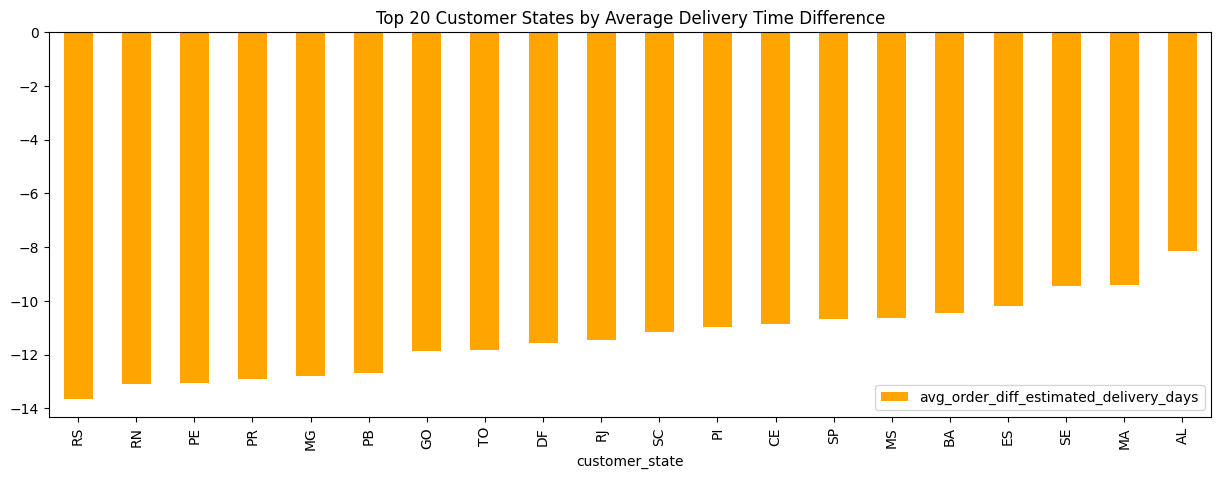

In [ ]:
df_most_days_diff_estimated_to_delivered_by_customer_state.head(20).sort_values(by="avg_order_diff_estimated_delivery_days").plot.bar(
    y=["avg_order_diff_estimated_delivery_days"],
    title="Top 20 Customer States by Average Delivery Time Difference",
    color=["orange"],
    figsize=(15, 5)
    )

**Top 15 Customer States with the Worst Delivery Time Scores**

<Axes: title={'center': 'Top 15 Customer States with the Worst Delivery Time Scores'}, ylabel='customer_state'>

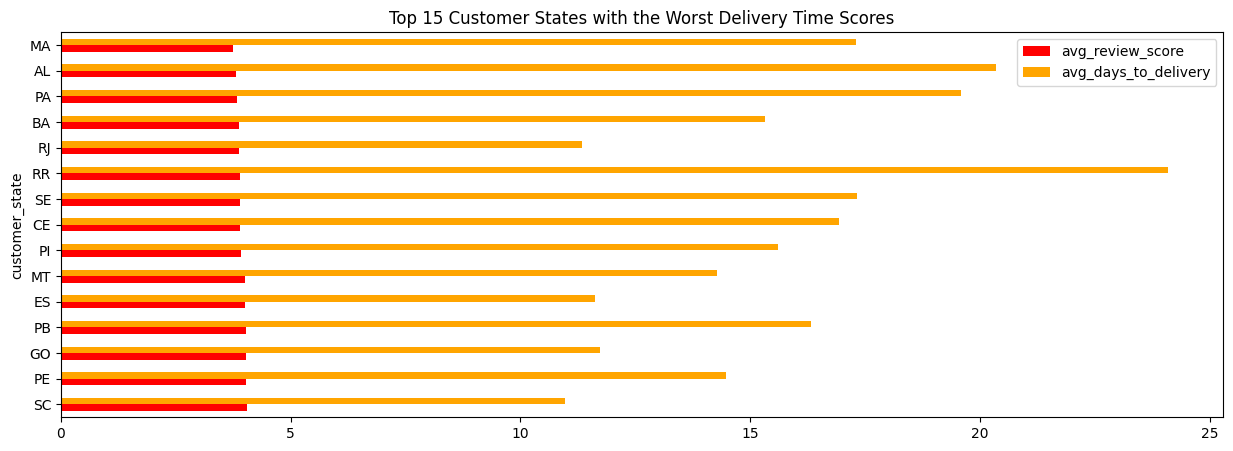

In [ ]:
df_avg_most_days_to_delivered_by_customer_state.sort_values(by="avg_review_score", ascending=False).tail(15).reset_index().plot.barh(
    x="customer_state",
    y=["avg_review_score", "avg_days_to_delivery"],
    color=["red", "orange"],
    title="Top 15 Customer States with the Worst Delivery Time Scores",
    figsize=(15, 5)
    )

**Top 20 Best-Selling Product Categories**

<Axes: title={'center': 'Top 20 Best-Selling Product Categories'}, xlabel='product_category_name_english'>

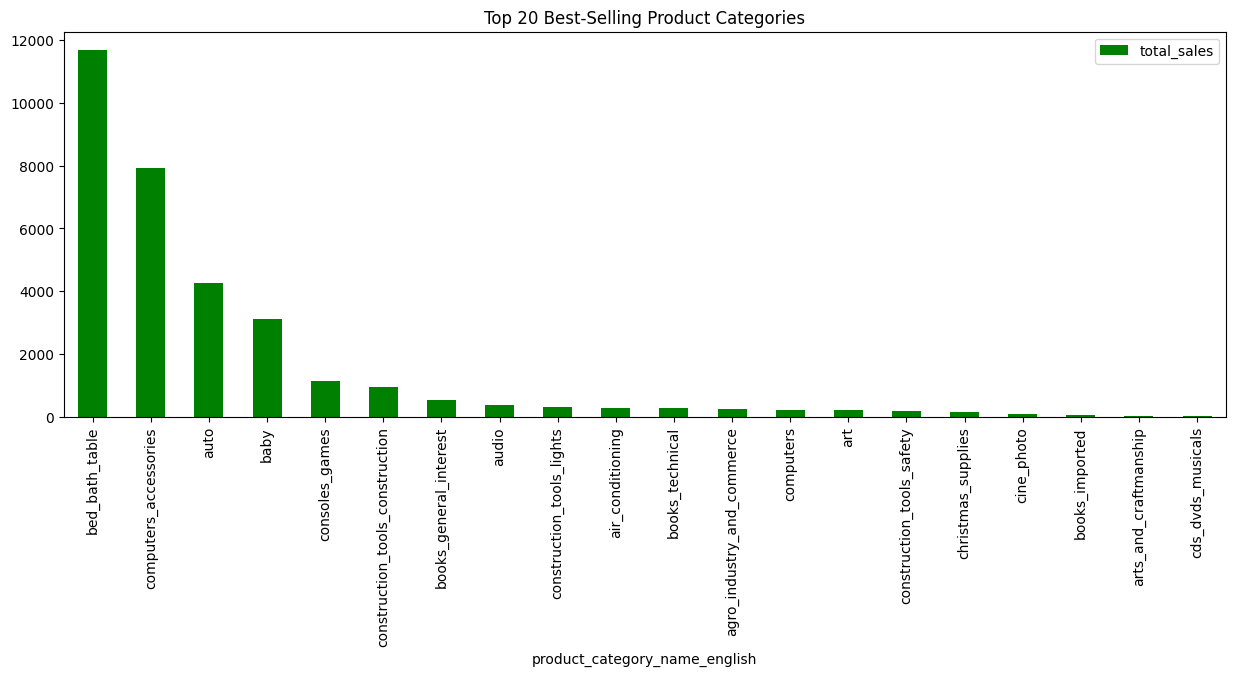

In [ ]:
df_best_sales_products_categories.groupby("product_category_name_english").agg({"total_sales": "sum"}).head(20).sort_values(
    by="total_sales",
    ascending=False
    ).reset_index().plot.bar(
        x="product_category_name_english",
        y="total_sales",
        color="green",
        figsize=(15, 5),
        title="Top 20 Best-Selling Product Categories"
        )

**Top 20 Product Categories with the Best Scores**

<Axes: title={'center': 'Top 20 Product Categories with the Best Scores'}, xlabel='product_category_name_english'>

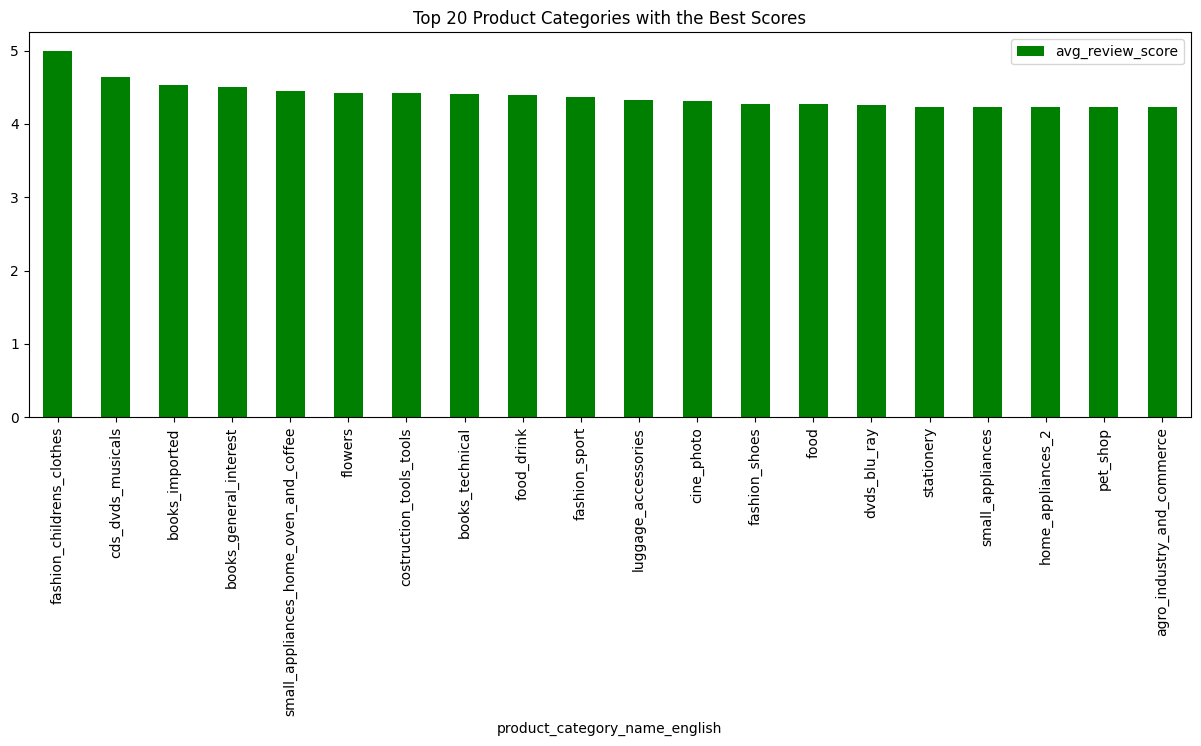

In [ ]:
df_best_product_categories_score.head(20).reset_index().plot.bar(
      x="product_category_name_english",
      y="avg_review_score",
      color="green",
      title="Top 20 Product Categories with the Best Scores",
      figsize=(15, 5)
)

**Top 20 Product Categories with the Worst Scores**

<Axes: title={'center': 'Top 20 Product Categories with the Worst Scores'}, xlabel='product_category_name_english'>

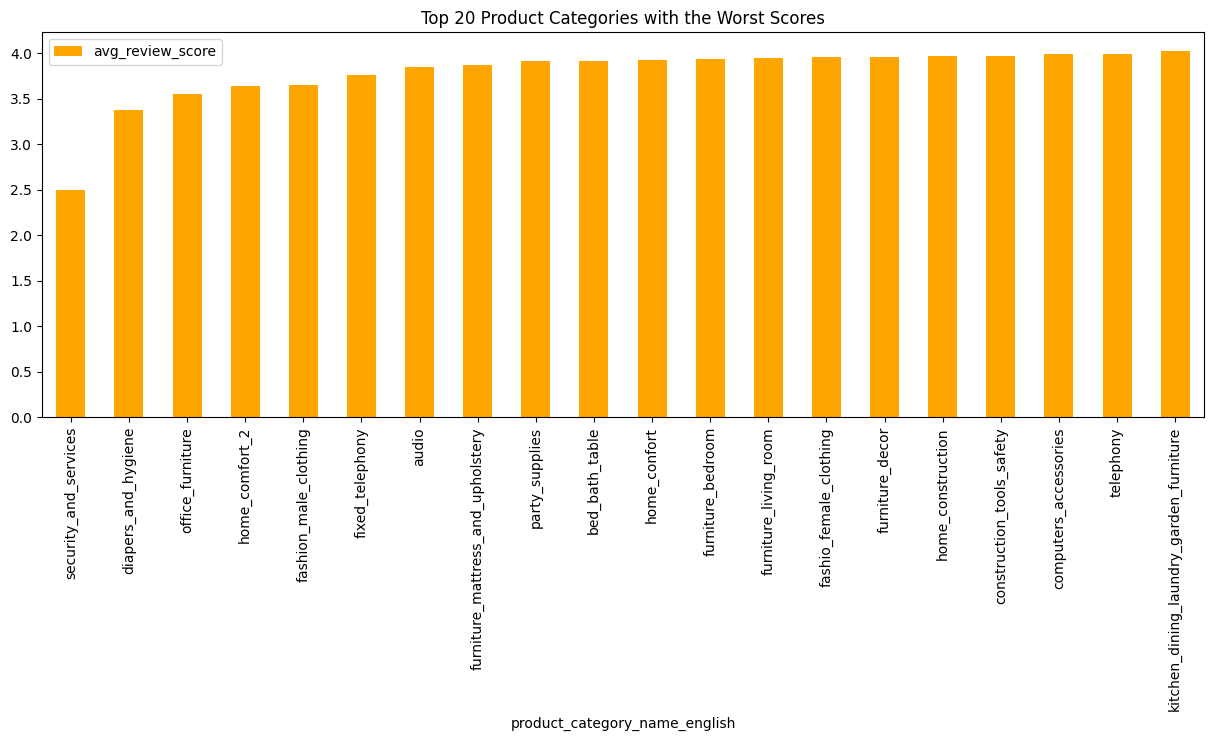

In [ ]:
df_worst_product_categories_score.head(20).reset_index().plot.bar(
      x="product_category_name_english",
      y="avg_review_score",
      color="orange",
      title="Top 20 Product Categories with the Worst Scores",
      figsize=(15, 5)
)

### Conclusion

In [ ]:
print("""
# São Paulo (SP) é o estado com o maior volume de vendas, com 80.728 produtos vendidos e R$ 12.771.107,02 faturados.

# SP também lidera as compras de produtos, seguido pelo Rio de Janeiro (RJ), com 14.566 produtos comprados e R$ 2.633.042,81 gastos.

# O frete para os estados RR, PB, RO, AC e TO ultrapassa os R$ 40,00, o que justifica a média baixa de 3,8 estrelas nas avaliações dos produtos.

# Os estados de RR, AP e AM possuem prazos de entrega extremamente longos, com mais de 40 dias de previsão. Normalmente, as empresas conseguem entregar de 15 a 20 dias antes, mas isso não impede que os compradores façam avaliações mais baixas.

# A diferença média entre a data prevista e a data real de entrega é de 8 a 10 dias a menos do que o prazo estimado.

# As categorias que mais venderam foram: bed_bath_table, health_beauty e sports_leisure, com R$ 335.864.564 de faturamento, mantendo uma média de entrega de 8,5 dias e uma avaliação média de 4 estrelas.

# As categorias fashion_childrens_clothes, cds_dvds_musicals e books_imported são as mais bem avaliadas, com uma média de 4,7 estrelas e um tempo médio de entrega de 7 dias.

# Por outro lado, as categorias com as piores avaliações foram security_and_services, diapers_and_hygiene e office_furniture, com uma média de 3,1 estrelas e um total de 1.787 vendas.

""")

 
# São Paulo (SP) é o estado com o maior volume de vendas, com 80.728 produtos vendidos e R$ 12.771.107,02 faturados.

# SP também lidera as compras de produtos, seguido pelo Rio de Janeiro (RJ), com 14.566 produtos comprados e R$ 2.633.042,81 gastos.

# O frete para os estados RR, PB, RO, AC e TO ultrapassa os R$ 40,00, o que justifica a média baixa de 3,8 estrelas nas avaliações dos produtos.

# Os estados de RR, AP e AM possuem prazos de entrega extremamente longos, com mais de 40 dias de previsão. Normalmente, as empresas conseguem entregar de 15 a 20 dias antes, mas isso não impede que os compradores façam avaliações mais baixas.

# A diferença média entre a data prevista e a data real de entrega é de 8 a 10 dias a menos do que o prazo estimado.

# As categorias que mais venderam foram: bed_bath_table, health_beauty e sports_leisure, com R$ 335.864.564 de faturamento, mantendo uma média de entrega de 8,5 dias e uma avaliação média de 4 estrelas.

# As categorias fashion_childrens

**End**